In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from time import sleep
from world import World
from agent_simple_random import Agent_simple_random 
from agent_hemilton_cycle import Agent_hemilton_cycle
from managers import Manager_simple, Breeder
from genetic import Agent_genetic_3
import ipywidgets as widgets
from ipywidgets import interactive
%matplotlib inline
import copy
import pickle

In [2]:
# %matplotlib tk
# plt.ion()

In [3]:
agent = Agent_simple_random()
w = World()
w.game(agent)

w.replay()

interactive(children=(IntSlider(value=83, description='step', max=167), Output(layout=Layout(height='450px')))…

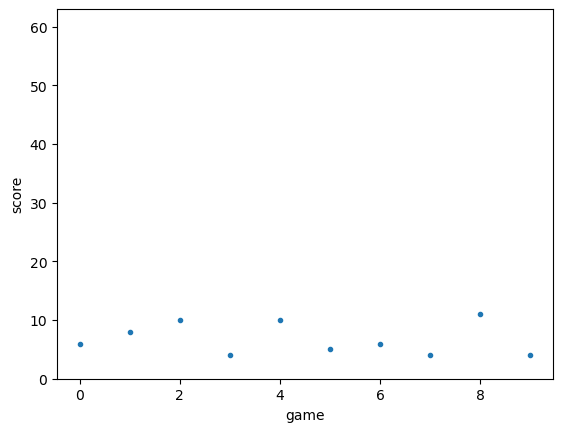

In [4]:
manager = Manager_simple(Agent_simple_random)

manager.play_games()
manager.plot()

# Genetic

In [5]:
br = Breeder(Agent_genetic_3, n_agents=200)
br.games_per_agent = 50

In [33]:
%%time
br.breed(40)

0 0.2839
1 0.3196
2 0.3125
3 0.3439
4 0.3313
5 0.3031
6 0.3308
7 0.3448
8 0.5064
9 0.9282
10 1.1226
11 1.8291
12 2.0015
13 2.2601
14 1.9511
15 2.099
16 2.1978
17 2.2904
18 2.4375
19 2.2973
20 2.3095
21 2.3568
22 2.4791
23 2.471
24 2.1043
25 2.5121
26 2.2514
27 2.4184
28 2.5764
29 2.5029
30 2.4629
31 2.3632
32 2.4688
33 2.4888
34 2.6517
35 2.4194
36 2.4019
37 2.4574
38 2.457
39 2.2231
CPU times: user 3h 3min 37s, sys: 2min 7s, total: 3h 5min 45s
Wall time: 3h 3min 14s


In [30]:
br.plot()

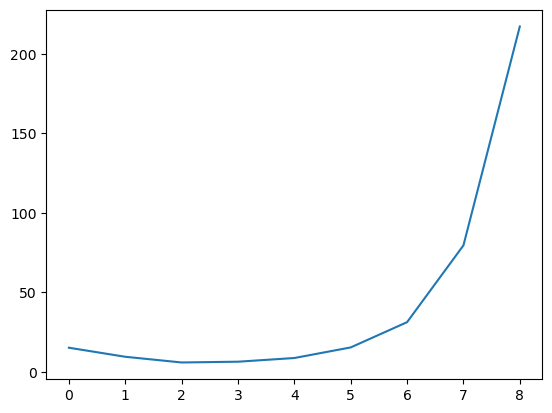

In [9]:
plt.plot(br.generation_steps)

In [ ]:
br.agents = np.array([*selected, *b, *(a[:70])])
len(br.agents)

In [ ]:
# br.agents

In [ ]:
br_ = copy.deepcopy(br)
selected = br_.select_agents()
len(selected)

In [ ]:

# # a = br_.agents
# pickle.dump(selected, open("agents_genetic_1", "wb"))

# b = pickle.load(open("agents_genetic_1", "rb"))
# a = pickle.load(open("agents_genetic_120", "rb"))
# b = 
# len(b)
# len(a)

In [31]:
agent = br.agents[20]
# w = World()
# w.game(agent)

# w.replay()

In [17]:
# # agent = Agent_hemilton_cycle()
# agent = Agent_simple_random()
# w = World()
# w.game(agent)
# w 

# w.replay()

In [32]:
%matplotlib tk
plt.ion()

def game(agent, w):
        w = World()
        fig, ax = plt.subplots()
        for i in range(19):
            if not w.game_over:
                agent_decision = agent.move(*w.view_3_end())
                w.step(agent_decision)
                ax.matshow(w.obs, origin='upper')
                plt.pause(0.01)
                sleep(0.01)

        # print(f'score {w.score}, steps {w.steps}')
        # return w.score, w.steps
game(agent, w)